In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
import matplotlib
def brown_green():
    '''
    returns a colormap based on colorbrewer diverging brown->green
    '''

    # colorbrewer colormap, diverging, brown->green
    cmap = np.zeros([11,3]);
    cmap[0,:] = 84,48,5
    cmap[1,:] = 140,81,10
    cmap[2,:] = 191,129,45
    cmap[3,:] = 223,194,125
    cmap[4,:] = 246,232,195
    cmap[5,:] = 245,245,245
    cmap[6,:] = 199,234,229
    cmap[7,:] = 128,205,193
    cmap[8,:] = 53,151,143
    cmap[9,:] = 1,102,94
    cmap[10,:] = 0,60,48
    cmap = matplotlib.colors.ListedColormap(cmap/256)
    
    return cmap

In [3]:
import statsmodels.api as sm

In [8]:
from utils import *

In [16]:
from scipy import stats

In [97]:
d='/glade/scratch/djk2120/postp/'
files=sorted(glob.glob(d+'*slope*.nc'))
ds=xr.open_mfdataset(files,combine='nested',concat_dim='mem')

In [118]:
y1,y2=str(ds.years[0].values).split('-')
yy=slice(y1,y2)

In [181]:
files=sorted(glob.glob(d+'*.ann.nc'))
def pp(ds):
    return ds[['TWS','NBP']].sel(year=yy)
g=xr.open_mfdataset(files,combine='nested',concat_dim='mem',preprocess=pp)
g['mem']=[f.split('/')[-1].split('ann')[0] for f in files]

In [124]:
la=xr.open_dataset('mask_grnlnd_antarc.nc').landarea

In [183]:
twsvar=((ds.p<0.05)*la*detrend_dim(g.TWS,'year')).stack({'memyear':['mem','year']}).var(dim='memyear').compute()

/glade/work/djk2120/miniconda3/envs/ppe-py/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [194]:
mgrids=(twsvar/twsvar.sum()*ds.slope.where(p<0.05)).sum(dim=['lat','lon']).compute()

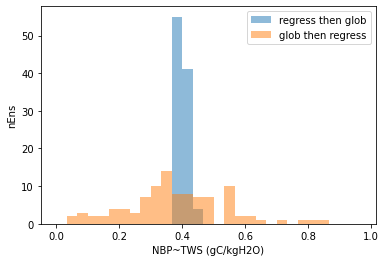

In [196]:
plt.hist(mgrids,np.arange(30)/30,alpha=0.5,label='regress then glob')
plt.hist(ds.glob[:,0],np.arange(30)/30,alpha=0.5,label='glob then regress')
plt.legend();
plt.xlabel('NBP~TWS (gC/kgH2O)')
plt.ylabel('nEns');

In [200]:
whit=xr.open_dataset('whitfull.nc')

In [206]:
sb=ds.slope.groupby(whit.biome).mean().compute()

In [221]:
twsvarbiome=(la*g.TWS).groupby(whit.biome).sum().var(dim=['mem','year']).compute()
twsvarbiome=100*twsvarbiome/twsvarbiome.sum()

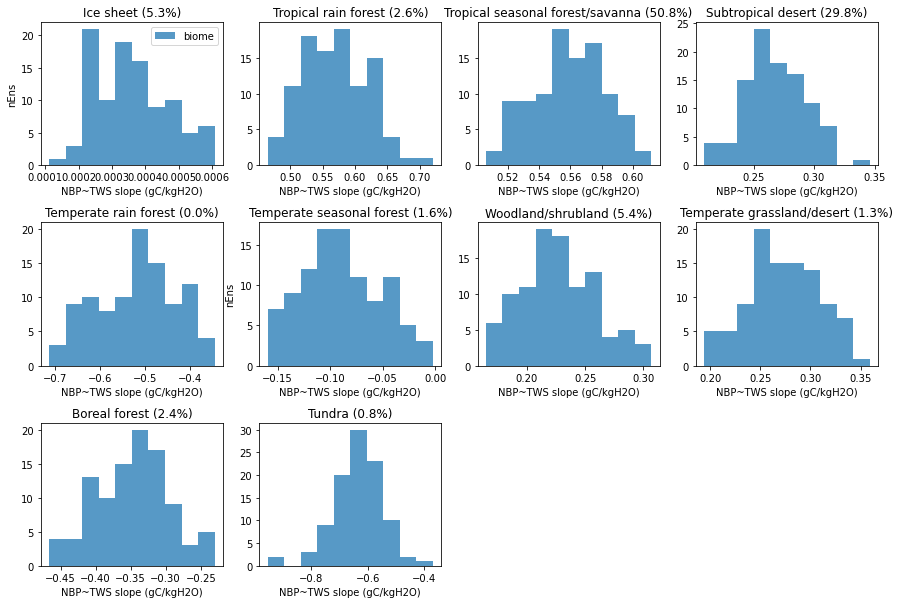

In [222]:
plt.figure(figsize=[15,10])
for i,b in enumerate(whit.biome_name.values):
    plt.subplot(3,4,i+1)
    plt.hist(mbiome['global'],label='global')
    plt.hist(sb.sel(biome=i),alpha=0.75,label='biome')
    plt.title(b+' ('+str(np.round(twsvarbiome.isel(biome=i).values,1))+'%)')

    plt.xlabel('NBP~TWS slope (gC/kgH2O)')
    if i%5==0:
        plt.ylabel('nEns')
    if i==0:
        plt.legend(loc=1)
    
plt.subplots_adjust(hspace=0.4)

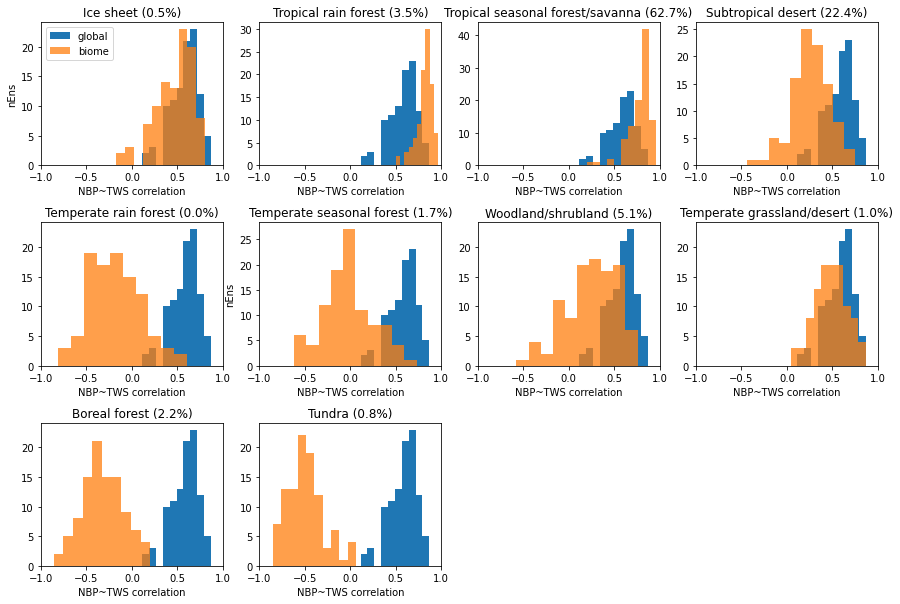

In [162]:
plt.figure(figsize=[15,10])
for i,b in enumerate(whit.biome_name.values):
    plt.subplot(3,4,i+1)
    plt.hist(rbiome['global'],label='global')
    plt.hist(rbiome[b],alpha=0.75,label='biome')
    plt.title(b+' ('+str(np.round(twsvarbiome.isel(biome=i).values,1))+'%)')

    plt.xlabel('NBP~TWS correlation')
    plt.xlim([-1,1])
    if i%5==0:
        plt.ylabel('nEns')
    if i==0:
        plt.legend(loc=2)
    
plt.subplots_adjust(hspace=0.4)

In [104]:
pprob=np.zeros(la.shape)
for mem in ps:
    pprob=pprob+1/len(ps)*(ps[mem]<0.05)
    

In [113]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

In [153]:
cmap = plt.cm.viridis
cmaplist = [cmap(i) for i in np.linspace(0,255,8).astype(int)]
vd=matplotlib.colors.ListedColormap(cmaplist)

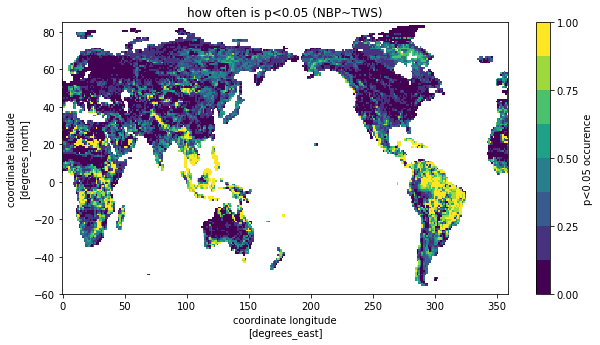

In [156]:
plt.figure(figsize=[10,5])
kwargs={'label':'p<0.05 occurence','ticks':np.arange(5)/4}
xr.DataArray(pprob,coords=la.coords).where(la>0).plot(cmap=vd,
                                                      cbar_kwargs=kwargs);
plt.ylim([-60,85])
plt.title('how often is p<0.05 (NBP~TWS)');

In [171]:
def pp(ds):
    return ds[['TSA','PREC']].sel(year=yy)
ds=xr.open_mfdataset(files,concat_dim='mem',combine='nested',
                     preprocess=pp).stack({'memyear':['mem','year']}).mean(dim='memyear').compute()

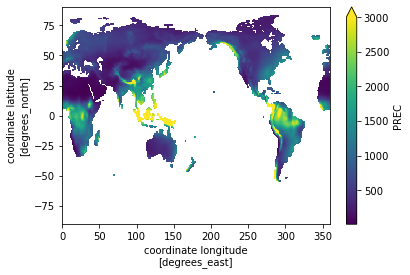

In [176]:
(24*60*60*365*ds.PREC).where(la>0).plot(vmax=3000)

In [178]:
savg=xr.DataArray([ss[m]/len(ss) for m in ss]

In [244]:
ix=(la>0)&(ds.NEP.mean(dim=['ens','year'])>0)

In [263]:
tsa=ds.TSA.mean(dim=['ens','year']).compute()
prec=ds.PREC.mean(dim=['ens','year']).compute()

In [282]:
tvals=265+np.arange(16)*2.5
pvals=100*np.arange(31)
s=np.zeros([30,15])+np.nan
for i in range(30):
    for j in range(15):
        ixt=(tsa>=tvals[j])&(tsa<tvals[j+1])
        ixp=(prec>=pvals[i])&(prec<pvals[i+1])
        ixtp=(ixt)&(ixp)
        if ix.values[ixtp].sum()>15:
            s[i,j]=np.nanmean(slopes[ixtp])

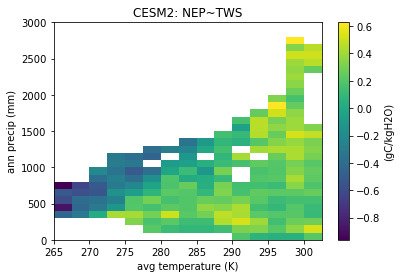

In [288]:
plt.pcolormesh(tvals,pvals,s)
plt.colorbar(label='(gC/kgH2O)')
plt.xlabel('avg temperature (K)')
plt.ylabel('ann precip (mm)')
plt.title('CESM2: NEP~TWS');